In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation = 'relu')(input_img)

decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [3]:
encoder = Model(input_img, encoded)

In [4]:
encoded_input = Input(shape = (encoding_dim, ))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

In [10]:
x_train.shape

(60000, 784)

In [11]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.2801 - val_loss: 0.1930
Epoch 2/10
60000/60000 [==============================] - 4s 58us/step - loss: 0.1724 - val_loss: 0.1542
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1450 - val_loss: 0.1343
Epoch 4/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1288 - val_loss: 0.1214
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1182 - val_loss: 0.1129
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1109 - val_loss: 0.1074
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1058 - val_loss: 0.1027
Epoch 8/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1021 - val_loss: 0.0995
Epoch 9/10
60000/60000 [==============================] - 4s 58us/step - loss: 0.0993 - val_loss: 0.0973
Epo

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [13]:
import matplotlib.pyplot as plt

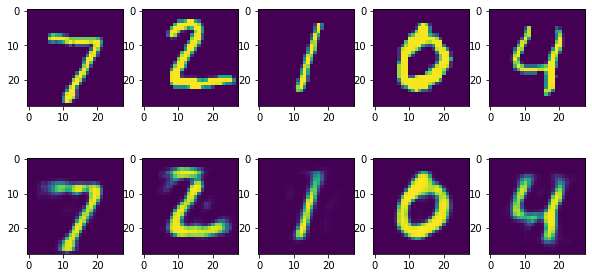

In [14]:
n = 5
plt.figure(figsize=(10, 5))

for i in range(n):
    #original images
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    
    #decoded images
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    
plt.show()

In [15]:
encoded_imgs.shape

(10000, 32)